<a href="https://colab.research.google.com/github/Manohar1805/DOGSvsCATS_CNN-TRANSFERLEARNING/blob/main/dogsvscats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manoharacv","key":"de7e335e66ca7b2f31b1b96aba007677"}'}

In [3]:
 ! mkdir ~/.kaggle 

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
 ! kaggle datasets list

ref                                                             title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                        480KB  2023-01-04 12:50:31           4651        171  1.0              
senapatirajesh/netflix-tv-shows-and-movies                      Latest Netflix TV shows and movies                  1MB  2023-01-14 17:03:12           1258         38  0.88235295       
johnny1994/divorce-rates-data-should-you-get-married            Divorce Rates Data: Should You Get Married?        22KB  2023-01-15 12:49:06            776         30  0.88235295       
rakkesharv/spotify-top-10000-streamed-songs                     Spotif

In [7]:
!kaggle datasets download -d chetankv/dogs-cats-images

 96% 419M/435M [00:06<00:00, 132MB/s]
100% 435M/435M [00:06<00:00, 73.6MB/s]


In [8]:
import zipfile

zip_ref=zipfile.ZipFile('/content/dogs-cats-images.zip','r')
zip_ref.extractall()
zip_ref.close()

In [9]:
import os

for dirpath, dirname, filename in os.walk('/content/dog vs cat'):
  print(f'There are {len(dirname)} folders and {len(filename)} in {dirpath}')

There are 1 folders and 0 in /content/dog vs cat
There are 2 folders and 0 in /content/dog vs cat/dataset
There are 2 folders and 0 in /content/dog vs cat/dataset/training_set
There are 0 folders and 4000 in /content/dog vs cat/dataset/training_set/dogs
There are 0 folders and 4000 in /content/dog vs cat/dataset/training_set/cats
There are 2 folders and 0 in /content/dog vs cat/dataset/test_set
There are 0 folders and 1000 in /content/dog vs cat/dataset/test_set/dogs
There are 0 folders and 1000 in /content/dog vs cat/dataset/test_set/cats


In [72]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import random

def view_random_image(dir_name,target_class):
  target_folder=dir_name+'/'+target_class

  random_image=random.sample(os.listdir(target_folder),1)

  img=mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  #plt.axis('off');
  print(f'image shape :{img.shape}')
  return img

image shape :(399, 500, 3)


array([[[ 77,  72,  66],
        [ 77,  72,  66],
        [ 77,  72,  66],
        ...,
        [ 76,  76,  78],
        [ 82,  82,  84],
        [ 82,  82,  84]],

       [[ 77,  72,  66],
        [ 77,  72,  66],
        [ 77,  72,  66],
        ...,
        [100, 100, 100],
        [103, 103, 103],
        [101, 101, 101]],

       [[ 78,  74,  65],
        [ 78,  74,  65],
        [ 78,  74,  65],
        ...,
        [147, 146, 144],
        [155, 154, 152],
        [158, 157, 155]],

       ...,

       [[ 78,  79,  65],
        [ 78,  79,  65],
        [ 78,  79,  65],
        ...,
        [106,  82,  58],
        [124, 100,  76],
        [156, 132, 108]],

       [[ 77,  78,  64],
        [ 77,  78,  64],
        [ 77,  78,  64],
        ...,
        [101,  77,  53],
        [121,  97,  73],
        [149, 125, 101]],

       [[ 77,  78,  64],
        [ 77,  78,  64],
        [ 77,  78,  64],
        ...,
        [ 98,  74,  50],
        [118,  94,  70],
        [144, 120,  96]]

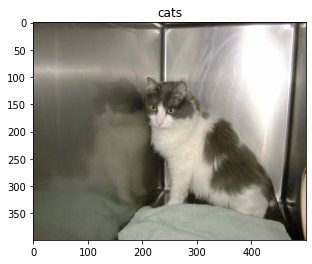

In [73]:
view_random_image('/content/dog vs cat/dataset/training_set','cats')

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=(1./255))
test_datagen=ImageDataGenerator(rescale=(1./255))

train_dir = '/content/dog vs cat/dataset/training_set/'
test_dir= '/content/dog vs cat/dataset/test_set'

print('training data has:')
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary')
print('test data has:')
test_data=test_datagen.flow_from_directory(test_dir,
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode='binary')

training data has:
Found 8000 images belonging to 2 classes.
test data has:
Found 2000 images belonging to 2 classes.


In [13]:
train_data.num_classes

2

In [14]:
import datetime
def create_tensorboard_callback(dir_name,exp_name):
  log_dir=dir_name+'/'+exp_name+'/'+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback=tf.kears.callback.TensorBoard(log_dir=log_dir)
  return tensorboard_callback

In [15]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(6,2,activation='relu'),
    tf.keras.layers.Conv2D(6,2,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1=model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
250/250 [==============================] - 33s 124ms/step - loss: 0.6866 - accuracy: 0.6026 - val_loss: 0.6387 - val_accuracy: 0.6185
Epoch 2/5
250/250 [==============================] - 33s 134ms/step - loss: 0.6048 - accuracy: 0.6700 - val_loss: 0.6255 - val_accuracy: 0.6510
Epoch 3/5
250/250 [==============================] - 31s 122ms/step - loss: 0.5660 - accuracy: 0.7023 - val_loss: 0.6073 - val_accuracy: 0.6625
Epoch 4/5
250/250 [==============================] - 31s 122ms/step - loss: 0.5320 - accuracy: 0.7339 - val_loss: 0.6148 - val_accuracy: 0.6540
Epoch 5/5
250/250 [==============================] - 31s 122ms/step - loss: 0.4825 - accuracy: 0.7739 - val_loss: 0.6086 - val_accuracy: 0.6505


In [16]:
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(history.history['loss']))

  #plot loss
  plt.plot(epochs,loss,label='training loss')
  plt.plot(epochs,val_loss,label='validation_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

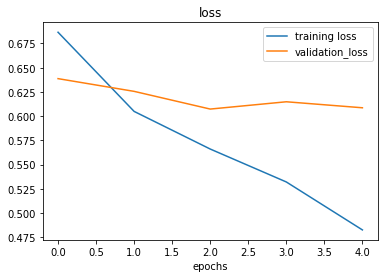

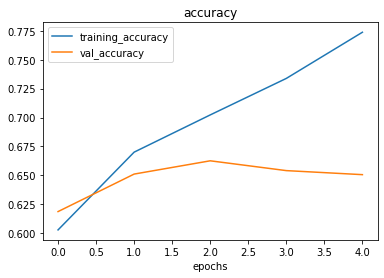

In [17]:
plot_loss_curves(history_1)

In [18]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(6,2,activation='relu'),
    tf.keras.layers.Conv2D(6,2,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(6,2,activation='relu'),
    tf.keras.layers.Conv2D(6,2,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2=model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
250/250 [==============================] - 32s 125ms/step - loss: 0.6608 - accuracy: 0.5899 - val_loss: 0.6209 - val_accuracy: 0.6430
Epoch 2/5
250/250 [==============================] - 36s 143ms/step - loss: 0.5712 - accuracy: 0.7039 - val_loss: 0.5808 - val_accuracy: 0.6885
Epoch 3/5
250/250 [==============================] - 31s 125ms/step - loss: 0.4914 - accuracy: 0.7604 - val_loss: 0.5732 - val_accuracy: 0.7035
Epoch 4/5
250/250 [==============================] - 33s 133ms/step - loss: 0.4267 - accuracy: 0.8104 - val_loss: 0.5972 - val_accuracy: 0.6940
Epoch 5/5
250/250 [==============================] - 31s 125ms/step - loss: 0.3693 - accuracy: 0.8356 - val_loss: 0.6575 - val_accuracy: 0.6960


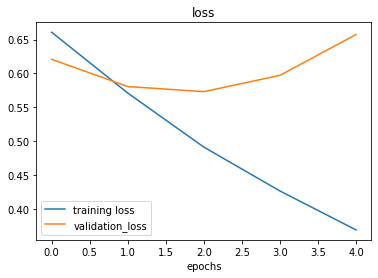

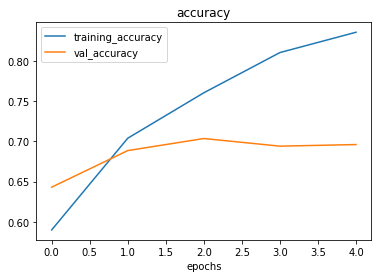

In [19]:
plot_loss_curves(history_2)

In [20]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Conv2D(6,2,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(6,2,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(6,2,activation='relu'),
    tf.keras.layers.Conv2D(6,2,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3=model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
250/250 [==============================] - 32s 126ms/step - loss: 0.6524 - accuracy: 0.6045 - val_loss: 0.6126 - val_accuracy: 0.6560
Epoch 2/5
250/250 [==============================] - 31s 123ms/step - loss: 0.5675 - accuracy: 0.7088 - val_loss: 0.6267 - val_accuracy: 0.6505
Epoch 3/5
250/250 [==============================] - 31s 125ms/step - loss: 0.4835 - accuracy: 0.7663 - val_loss: 0.5734 - val_accuracy: 0.6905
Epoch 4/5
250/250 [==============================] - 31s 124ms/step - loss: 0.4059 - accuracy: 0.8134 - val_loss: 0.6028 - val_accuracy: 0.7040
Epoch 5/5
250/250 [==============================] - 33s 132ms/step - loss: 0.3386 - accuracy: 0.8521 - val_loss: 0.7030 - val_accuracy: 0.6730


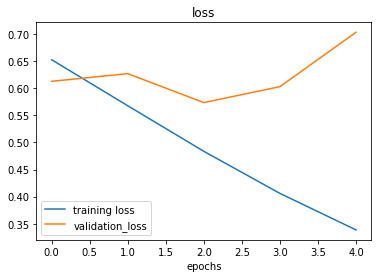

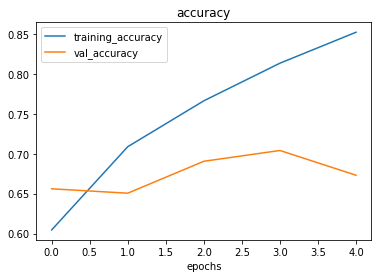

In [21]:
plot_loss_curves(history_3)

In [22]:
model_4=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,2,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,2,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    #tf.keras.layers.Conv2D(10,2,activation='relu'),
    #tf.keras.layers.Conv2D(10,2,activation='relu'),
    #tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_4=model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
250/250 [==============================] - 32s 125ms/step - loss: 0.6894 - accuracy: 0.6245 - val_loss: 0.6021 - val_accuracy: 0.6805
Epoch 2/5
250/250 [==============================] - 31s 124ms/step - loss: 0.5501 - accuracy: 0.7144 - val_loss: 0.5863 - val_accuracy: 0.6880
Epoch 3/5
250/250 [==============================] - 31s 125ms/step - loss: 0.4659 - accuracy: 0.7782 - val_loss: 0.5882 - val_accuracy: 0.7010
Epoch 4/5
250/250 [==============================] - 31s 124ms/step - loss: 0.3833 - accuracy: 0.8340 - val_loss: 0.6227 - val_accuracy: 0.6940
Epoch 5/5
250/250 [==============================] - 31s 124ms/step - loss: 0.3034 - accuracy: 0.8802 - val_loss: 0.6565 - val_accuracy: 0.6865


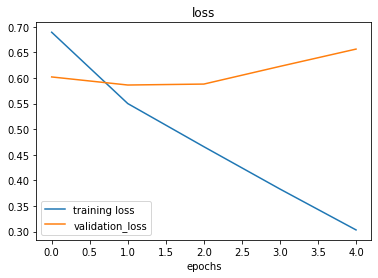

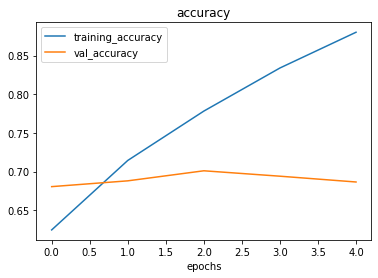

In [23]:
plot_loss_curves(history_4)

In [24]:
model_5=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,2,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,2,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,2,activation='relu'),
    tf.keras.layers.Conv2D(10,2,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_5=model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
250/250 [==============================] - 34s 134ms/step - loss: 0.6505 - accuracy: 0.6049 - val_loss: 0.6080 - val_accuracy: 0.6625
Epoch 2/5
250/250 [==============================] - 32s 127ms/step - loss: 0.5936 - accuracy: 0.6794 - val_loss: 0.5885 - val_accuracy: 0.6865
Epoch 3/5
250/250 [==============================] - 31s 125ms/step - loss: 0.5275 - accuracy: 0.7396 - val_loss: 0.5862 - val_accuracy: 0.6970
Epoch 4/5
250/250 [==============================] - 31s 126ms/step - loss: 0.4717 - accuracy: 0.7734 - val_loss: 0.6012 - val_accuracy: 0.6955
Epoch 5/5
250/250 [==============================] - 32s 126ms/step - loss: 0.4046 - accuracy: 0.8173 - val_loss: 0.5735 - val_accuracy: 0.7210


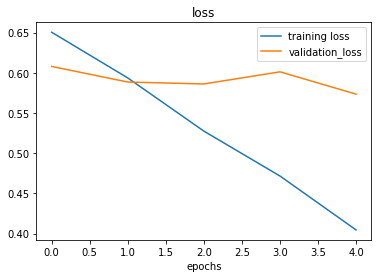

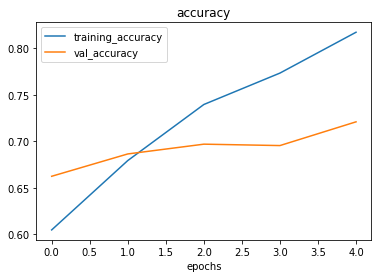

In [25]:
plot_loss_curves(history_5)

In [26]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [27]:
IMG_SHAPE=(224,224)
BATCH_SIZE=32
import tensorflow_hub as hub
def create_model(model_url,num_classes=10):
  feature_extroctor_layer=hub.KerasLayer(model_url,
                                        trainable=False,
                                        name='feature_extrotor_layer',
                                        input_shape=IMG_SHAPE+(3,))
  model=tf.keras.Sequential([feature_extroctor_layer,
                            tf.keras.layers.Dense(num_classes,activation='sigmoid',name='output_layer')
  ])
  return model

In [28]:
resnet_model=create_model(resnet_url,1)

resnet_model.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])
resnet_history=resnet_model.fit(train_data,
                 epochs=5,
                 steps_per_epoch=len(train_data),
                 validation_data=test_data,
                 validation_steps=len(test_data))

Epoch 1/5
250/250 [==============================] - 41s 150ms/step - loss: 0.0730 - accuracy: 0.9740 - val_loss: 0.0403 - val_accuracy: 0.9900
Epoch 2/5
250/250 [==============================] - 36s 144ms/step - loss: 0.0270 - accuracy: 0.9918 - val_loss: 0.0370 - val_accuracy: 0.9910
Epoch 3/5
250/250 [==============================] - 38s 150ms/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.0372 - val_accuracy: 0.9905
Epoch 4/5
250/250 [==============================] - 36s 144ms/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0.0385 - val_accuracy: 0.9900
Epoch 5/5
250/250 [==============================] - 36s 144ms/step - loss: 0.0123 - accuracy: 0.9965 - val_loss: 0.0384 - val_accuracy: 0.9910


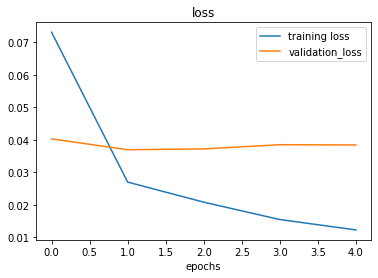

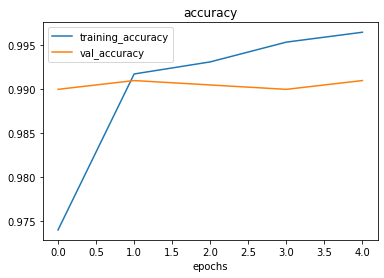

In [29]:
plot_loss_curves(resnet_history)

In [30]:
eff_model=create_model(efficientnet_url,1)

eff_model.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])
eff_history=eff_model.fit(train_data,
                 epochs=5,
                 steps_per_epoch=len(train_data),
                 validation_data=test_data,
                 validation_steps=len(test_data))

Epoch 1/5
250/250 [==============================] - 42s 139ms/step - loss: 0.1198 - accuracy: 0.9697 - val_loss: 0.0448 - val_accuracy: 0.9885
Epoch 2/5
250/250 [==============================] - 34s 135ms/step - loss: 0.0365 - accuracy: 0.9905 - val_loss: 0.0322 - val_accuracy: 0.9895
Epoch 3/5
250/250 [==============================] - 34s 134ms/step - loss: 0.0271 - accuracy: 0.9923 - val_loss: 0.0280 - val_accuracy: 0.9920
Epoch 4/5
250/250 [==============================] - 34s 135ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0.0258 - val_accuracy: 0.9925
Epoch 5/5
250/250 [==============================] - 36s 142ms/step - loss: 0.0197 - accuracy: 0.9942 - val_loss: 0.0250 - val_accuracy: 0.9925


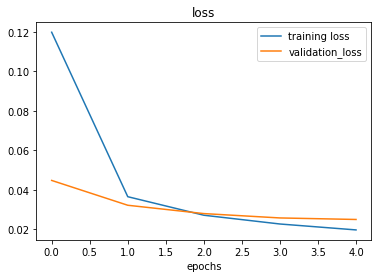

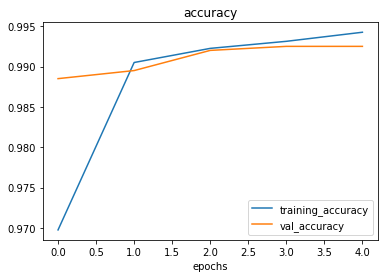

In [31]:
plot_loss_curves(eff_history)

In [32]:
eff_model.evaluate(test_data)

63/63 [==============================] - 7s 106ms/step - loss: 0.0250 - accuracy: 0.9925


[0.024976687505841255, 0.9925000071525574]

In [71]:
def load_prep_image(filename,img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.resize(img,[img_shape,img_shape])
  img=img/255.
  img=tf.expand_dims(img,axis=0)
  return img

In [35]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTcHCAXQ2UFe1NZWopiYK2H2fboi5dL-YP5OpTmAX_C&s

/bin/bash: s: command not found
--2023-01-25 05:07:49--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTcHCAXQ2UFe1NZWopiYK2H2fboi5dL-YP5OpTmAX_C
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 172.253.115.139, 172.253.115.100, 172.253.115.138, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|172.253.115.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3993 (3.9K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcTcHCAXQ2UFe1NZWopiYK2H2fboi5dL-YP5OpTmAX_C’

images?q=tbn:ANd9Gc 100%[===================>]   3.90K  --.-KB/s    in 0s      

2023-01-25 05:07:50 (65.6 MB/s) - ‘images?q=tbn:ANd9GcTcHCAXQ2UFe1NZWopiYK2H2fboi5dL-YP5OpTmAX_C’ saved [3993/3993]



In [44]:
a=load_prep_image('/content/photo-1611003228941-98852ba62227.jpg')
a

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.        , 0.00392157, 0.01960784],
        [0.        , 0.00392157, 0.01176471],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.01568628, 0.02745098, 0.05490196],
        [0.02015651, 0.03192122, 0.0593722 ],
        [0.03118964, 0.04295435, 0.07040533]],

       [[0.        , 0.00392157, 0.01960784],
        [0.        , 0.00392157, 0.01176471],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.01960784, 0.03137255, 0.05882353],
        [0.02517542, 0.03694013, 0.0643911 ],
        [0.02745098, 0.03921569, 0.06666667]],

       [[0.        , 0.0005077 , 0.01619398],
        [0.        , 0.0005077 , 0.00835084],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.02011555, 0.03188025, 0.05933123],
        [0.02403711, 0.03580182, 0.0632528 ],
        [0.02390111, 0.03566581, 0.0631168 ]],

       ...,

       [[0.2342437 , 0.31267506, 0.3558123 ],
        [0.23

In [45]:
print(f'shape before new dim : {a.shape}')
img=tf.expand_dims(a,axis=0)
print(f'shape after new dimesnsion:{img.shape}')
img

shape before new dim : (224, 224, 3)
shape after new dimesnsion:(1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.        , 0.00392157, 0.01960784],
         [0.        , 0.00392157, 0.01176471],
         [0.        , 0.        , 0.00784314],
         ...,
         [0.01568628, 0.02745098, 0.05490196],
         [0.02015651, 0.03192122, 0.0593722 ],
         [0.03118964, 0.04295435, 0.07040533]],

        [[0.        , 0.00392157, 0.01960784],
         [0.        , 0.00392157, 0.01176471],
         [0.        , 0.        , 0.00784314],
         ...,
         [0.01960784, 0.03137255, 0.05882353],
         [0.02517542, 0.03694013, 0.0643911 ],
         [0.02745098, 0.03921569, 0.06666667]],

        [[0.        , 0.0005077 , 0.01619398],
         [0.        , 0.0005077 , 0.00835084],
         [0.        , 0.        , 0.00784314],
         ...,
         [0.02011555, 0.03188025, 0.05933123],
         [0.02403711, 0.03580182, 0.0632528 ],
         [0.02390111, 0.03566581, 0.0631168 ]],

        ...,

        [[0.2342437 , 0.31267506, 

In [48]:
eff_model.predict(img)

1/1 [==============================] - 1s 1s/step


array([[0.9997799]], dtype=float32)

In [49]:
b=load_prep_image('/content/images.jpg')

In [50]:
print(f'shape before new dim : {b.shape}')
b=tf.expand_dims(b,axis=0)
print(f'shape after new dimesnsion:{img.shape}')
b

shape before new dim : (224, 224, 3)
shape after new dimesnsion:(1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.9372549 , 0.92941177, 0.87058824],
         [0.9372549 , 0.92941177, 0.87058824],
         [0.9349089 , 0.9270658 , 0.86824226],
         ...,
         [0.88862044, 0.8862745 , 0.7599789 ],
         [0.8853291 , 0.8853291 , 0.750105  ],
         [0.88235295, 0.88235295, 0.7411765 ]],

        [[0.9372549 , 0.92941177, 0.87058824],
         [0.9372549 , 0.92941177, 0.87058824],
         [0.9349089 , 0.9270658 , 0.86824226],
         ...,
         [0.88729864, 0.8849527 , 0.7586571 ],
         [0.88400733, 0.88400733, 0.74878323],
         [0.88103116, 0.88103116, 0.7398547 ]],

        [[0.9372549 , 0.92941177, 0.87058824],
         [0.9372549 , 0.92941177, 0.87058824],
         [0.9349089 , 0.9270658 , 0.86824226],
         ...,
         [0.88511026, 0.88276434, 0.7564687 ],
         [0.88181895, 0.88181895, 0.74659485],
         [0.8788428 , 0.8788428 , 0.7376663 ]],

        ...,

        [[0.24190299, 0.17049192, 

In [70]:
eff_model.predict(b)

1/1 [==============================] - 0s 37ms/step


array([[0.9993754]], dtype=float32)

In [55]:
d =load_prep_image('/content/cat.jpg')
d.shape
d

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.09411765, 0.08235294, 0.0627451 ],
        [0.09411765, 0.08235294, 0.0627451 ],
        [0.09803922, 0.08627451, 0.06666667],
        ...,
        [0.2901961 , 0.22352941, 0.16078432],
        [0.28246987, 0.21972476, 0.15697965],
        [0.27361873, 0.21087363, 0.14812854]],

       [[0.09411765, 0.08235294, 0.0627451 ],
        [0.09488796, 0.08312325, 0.0635154 ],
        [0.09803922, 0.08627451, 0.06666667],
        ...,
        [0.2784314 , 0.21568628, 0.15294118],
        [0.26666668, 0.21568628, 0.14901961],
        [0.25882354, 0.20784314, 0.14117648]],

       [[0.09411765, 0.07843138, 0.06666667],
        [0.09411765, 0.07843138, 0.06666667],
        [0.09411765, 0.07843138, 0.06666667],
        ...,
        [0.25787815, 0.20689775, 0.14023109],
        [0.2509804 , 0.2       , 0.13333334],
        [0.24705882, 0.19607843, 0.12941177]],

       ...,

       [[0.0649244 , 0.0649244 , 0.05708126],
        [0.06

In [56]:
print(f'shape before new dim : {d.shape}')
d=tf.expand_dims(d,axis=0)
print(f'shape after new dimesnsion:{d.shape}')
d

shape before new dim : (224, 224, 3)
shape after new dimesnsion:(1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.09411765, 0.08235294, 0.0627451 ],
         [0.09411765, 0.08235294, 0.0627451 ],
         [0.09803922, 0.08627451, 0.06666667],
         ...,
         [0.2901961 , 0.22352941, 0.16078432],
         [0.28246987, 0.21972476, 0.15697965],
         [0.27361873, 0.21087363, 0.14812854]],

        [[0.09411765, 0.08235294, 0.0627451 ],
         [0.09488796, 0.08312325, 0.0635154 ],
         [0.09803922, 0.08627451, 0.06666667],
         ...,
         [0.2784314 , 0.21568628, 0.15294118],
         [0.26666668, 0.21568628, 0.14901961],
         [0.25882354, 0.20784314, 0.14117648]],

        [[0.09411765, 0.07843138, 0.06666667],
         [0.09411765, 0.07843138, 0.06666667],
         [0.09411765, 0.07843138, 0.06666667],
         ...,
         [0.25787815, 0.20689775, 0.14023109],
         [0.2509804 , 0.2       , 0.13333334],
         [0.24705882, 0.19607843, 0.12941177]],

        ...,

        [[0.0649244 , 0.0649244 , 

In [57]:
eff_model.predict(d)

1/1 [==============================] - 0s 22ms/step


array([[0.0011971]], dtype=float32)

In [58]:
model_1.predict(d)

1/1 [==============================] - 0s 132ms/step


array([[0.27933344]], dtype=float32)

In [59]:
model_2.predict(d)

1/1 [==============================] - 0s 84ms/step


array([[0.53016675]], dtype=float32)

In [62]:
model_7=tf.keras.Sequential([
    tf.keras.layers.Conv2D(6,2,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(6,2,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(6,2,activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(18,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_7=model_7.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
250/250 [==============================] - 33s 128ms/step - loss: 0.6820 - accuracy: 0.5810 - val_loss: 0.6378 - val_accuracy: 0.6545
Epoch 2/5
250/250 [==============================] - 31s 125ms/step - loss: 0.6191 - accuracy: 0.6576 - val_loss: 0.6454 - val_accuracy: 0.6335
Epoch 3/5
250/250 [==============================] - 31s 124ms/step - loss: 0.5683 - accuracy: 0.7041 - val_loss: 0.5897 - val_accuracy: 0.6885
Epoch 4/5
250/250 [==============================] - 34s 133ms/step - loss: 0.5222 - accuracy: 0.7442 - val_loss: 0.5716 - val_accuracy: 0.6975
Epoch 5/5
250/250 [==============================] - 31s 123ms/step - loss: 0.4758 - accuracy: 0.7810 - val_loss: 0.5820 - val_accuracy: 0.7050


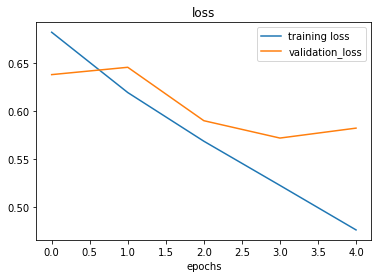

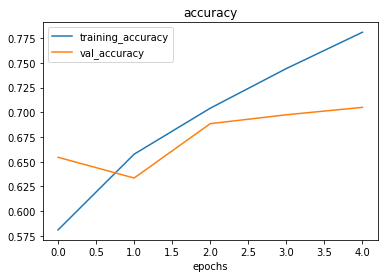

In [64]:
plot_loss_curves(history_7)

In [65]:
model_7.predict(d)

1/1 [==============================] - 0s 115ms/step


array([[0.4532865]], dtype=float32)

In [68]:
train_data.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)